In [40]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [9]:
#加载MNIST手写数字数据集
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [10]:
print('样本数量：{}, 样本特征数：{}'.format(mnist.data.shape[0],
                                 mnist.data.shape[1]))

样本数量：70000, 样本特征数：784


In [11]:
X = mnist.data/255.
y = mnist.target

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 5000, test_size=1000,random_state=62)

In [13]:
mlp_hw = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[100,100],
                       activation='relu', alpha = 1e-5,random_state=62)
mlp_hw.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=[100, 100], random_state=62,
              solver='lbfgs')

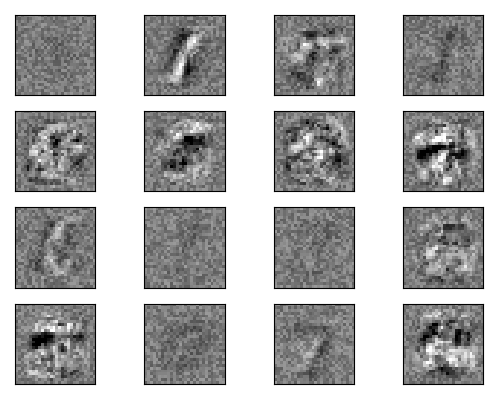

In [17]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp_hw.coefs_[0].min(), mlp_hw.coefs_[0].max()
for coef, ax in zip(mlp_hw.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [ ]:
from PIL import Image
image=Image.open('4.png').convert('F')
image=image.resize((28,28))
image.show()

arr=[]
for i in range(28):
    for j in range(28):
        pixel = 1.0 - float(image.getpixel((j,i)))/255.
        #pixel = float(image.getpixel((j,i)))/255.

        arr.append(pixel)
arr1 = np.array(arr).reshape(1,-1)
print('图片中的数字是:{:.0f}'.format(mlp_hw.predict(arr1)[0]))

# 波士顿房价使用神经网络进行回归任务的练习

In [43]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

In [44]:
# 加载波士顿房价数据集
boston = load_boston()
X, y = boston.data, boston.target

# 数据预处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 训练模型
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = mlp.predict(X_test)

# 计算模型的均方误差和决定系数
mse = np.mean((y_pred - y_test) ** 2)
r2 = mlp.score(X_test, y_test)

print('模型的均方误差为：{:.2f}'.format(mse))
print('模型的决定系数为：{:.2f}'.format(r2))

模型的均方误差为：14.50
模型的决定系数为：0.80


# --------------------------------------------------------------

### alpha = 0.01 max _iter = 3000 activation = tanh solver = adam(数据多)

In [42]:
mses = []
r2s = []
models =(MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', solver='adam', alpha=0.01, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1, random_state=42),
        MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', solver='adam', alpha=0.01, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=10, random_state=42),
         MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', solver='adam', alpha=0.01, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=100, random_state=42),
        MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', solver='adam', alpha=0.01, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=42),
        MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', solver='adam', alpha=0.01, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=3000, random_state=42),
        MLPRegressor(hidden_layer_sizes=(100,100), activation='tanh', solver='adam', alpha=0.01, 
                   learning_rate='constant', learning_rate_init=0.01, max_iter=3000, random_state=42))
models = (clf.fit(X, y) for clf in models)

for m in models:
    # 在测试集上进行预测
    y_pred = m.predict(X_test)

    # 计算模型的均方误差和决定系数
    mse = np.mean((y_pred - y_test) ** 2)
    r2 = m.score(X_test, y_test)

    print('模型的均方误差为：{:.2f}'.format(mse))
    print('模型的决定系数为：{:.2f}\n'.format(r2))
    

模型的均方误差为：501.78
模型的决定系数为：-5.84

模型的均方误差为：345.60
模型的决定系数为：-3.71

模型的均方误差为：31.18
模型的决定系数为：0.57

模型的均方误差为：1.50
模型的决定系数为：0.98

模型的均方误差为：0.43
模型的决定系数为：0.99

模型的均方误差为：0.47
模型的决定系数为：0.99



### 参数说明（分类和回归参数一致）：

1.hidden_layer_sizes :例如hidden_layer_sizes=(50, 50)，表示有两层隐藏层，第一层隐藏层有50个神经元，第二层也有50个神经元。

2.activation :激活函数,{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, 默认relu
    identity：f(x) = x
    logistic：其实就是sigmod,f(x) = 1 / (1 + exp(-x)).
    tanh：f(x) = tanh(x).
    relu：f(x) = max(0, x)

3.solver： 权重优化器，{‘lbfgs’, ‘sgd’, ‘adam’}, 默认adam
    lbfgs：quasi-Newton方法的优化器
    sgd：随机梯度下降
    adam： Kingma, Diederik, and Jimmy Ba提出的机遇随机梯度的优化器
    注意：默认solver ‘adam’在相对较大的数据集上效果比较好（几千个样本或者更多），对小数据集来说，lbfgs收敛更快效果也更好。

4.alpha :float,可选的，默认0.0001,正则化项参数

5.batch_size : int , 可选的，默认’auto’,随机优化的minibatches的大小batch_size=min(200,n_samples)，如果solver是’lbfgs’，分类器将不使用minibatch

6.learning_rate :学习率,用于权重更新,只有当solver为’sgd’时使用，{‘constant’，’invscaling’, ‘adaptive’},默认constant
    ‘constant’: 有’learning_rate_init’给定的恒定学习率
    ‘incscaling’：随着时间t使用’power_t’的逆标度指数不断降低学习率learning_rate_ ，effective_learning_rate = learning_rate_init / pow(t, power_t)
‘adaptive’：只要训练损耗在下降，就保持学习率为’learning_rate_init’不变，当连续两次不能降低训练损耗或验证分数停止升高至少tol时，将当前学习率除以5.

7.power_t: double, 可选, default 0.5，只有solver=’sgd’时使用，是逆扩展学习率的指数.当learning_rate=’invscaling’，用来更新有效学习率。

8.max_iter: int，可选，默认200，最大迭代次数。

9.random_state:int 或RandomState，可选，默认None，随机数生成器的状态或种子。

10..shuffle: bool，可选，默认True,只有当solver=’sgd’或者‘adam’时使用，判断是否在每次迭代时对样本进行清洗。

11.tol：float, 可选，默认1e-4，优化的容忍度

12.learning_rate_int:double,可选，默认0.001，初始学习率，控制更新权重的补偿，只有当solver=’sgd’ 或’adam’时使用。


## 学习率太大会造成网络不能收敛，在最优值附近徘徊;
## 学习率太小，网络收敛非常缓慢

In [49]:
s = ('1','2','3','4','5','6')
s[-3:-2]

('4',)